# 1. Credit Card Fraud Detection - Business Understanding

## Credit Card Fraud Detection 

According to recent reports, Nigerian financial space lost approximately N53.4 billion to fraud in the first nine months of 2024, a significant increase compared to the previous year (N9.4 billion), with the majority of losses occurring in the second quarter where banks lost around N42.6 billion to fraudulent activities. Loss due to Fraudulent activities is a huge concern which organizations would be willing to explore in otder to avoid loss. Added to this, detecting the right transactions as faudulent is another problem that must be solved adequately in order not to block legitimate transactions and frustrate customers. 

### What Problem Are We Solving?
Banks and financial institutions lose billions of Naira every year due to fraudulent transactions.  
They need a system that can tell the difference between:  
- Legitimate transactions (safe to approve)  
- Fraudulent transactions (must be blocked)  

### Project Goal
The goal of this project is to build a machine learning model that helps financial institutions:  
- Detect fraud with high accuracy so real transactions are not blocked unnecessarily.  
- Minimize false alarms to improve customer experience.  
- Handle fraud data effectively since fraud cases are much rarer than normal transactions (Class Imbalance).  


# 2. Importing Required Libraries

For this initiative, we need to import the following important libraries:

- **NumPy (`np`)** → Numerical Computations. 
- **Pandas (`pd`)** → Data Wrangling.   
- **Matplotlib & Seaborn** → Data visualization and EDA.  
- **Scikit-learn (`sklearn`)** → Machine learning toolkit.  
- **Imbalanced-learn (`SMOTE`)** → Class Imbalance Handling.  
- **XGBoost (`xgboost`)** → ML Model for Classification.

In [1]:
#All important Imports
import warnings

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Pandas for data manipulation/data handling
import numpy as np

# Install imbalanced-learn if needed
# pip install -q imbalanced-learn

from sklearn.model_selection import train_test_split

# Import required libraries like SMOTE for handling imbalance data
from imblearn.over_sampling import SMOTE
import collections

# Standardize the feature variables to have a mean of 0 and variance of 1
# Import required libraries for Scaling imbalance data
from sklearn.preprocessing import StandardScaler

# Import required libraries for Model Creation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Install xgboost if needed
# pip install -q xgboost

# Import required libraries for Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Store models and their accuracy scores
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# 3. Data Understanding

In [2]:
# Load the train and test credit card transactions dataset
df_train = pd.read_csv(r"train.csv" ) 

# view sample train data 
print(df_train.shape)
df_train.head()  


(219129, 32)


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [3]:
df_test = pd.read_csv(r"test.csv" ) 
print(df_test.shape)
df_test.head()

(146087, 31)


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


The dataset contains credit card transactions with the following key columns:  

- **Time**: Number of seconds elapsed between this transaction and the first transaction in the dataset.  
- **Amount**: Transaction amount.  
- **Class**:  
  - 0 → Non-Fraudulent transaction  
  - 1 → Fraudulent transaction  
- **V1 to V28**: Anonymized features created using Principal Component Analysis (PCA) to protect sensitive details.  


In [4]:
# View dataset brief summary for Missing data and datatype
df_train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [5]:
# View dataset brief summary for Missing data and datatype
df_test.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

### Insight:
- Displays the **number of rows and columns** in the dataset.  
- Shows the **data types of each column** (e.g., integer, float).  
- Checks for **missing values** in any column - there are no missing values for both data set.  

In [6]:
# Display summary statistics for numerical columns in both dataset
df_train.describe() 

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,109564.000000,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,63257.237906,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,-0.000000,0.000000
25%,54782.000000,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,109564.000000,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,164346.000000,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,219128.000000,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [7]:
df_test.describe() 

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,...,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000
mean,292172.000000,144637.928166,0.512929,-0.013098,-0.697478,-0.273258,0.321856,-0.050204,0.073419,0.043803,...,-0.056678,0.044729,0.175461,0.018471,0.016029,-0.118352,-0.015199,0.006236,0.002035,66.182463
std,42171.828725,14258.025396,1.628455,1.247749,1.292522,1.365752,1.146215,1.332880,0.946681,0.749513,...,0.458364,0.449017,0.710704,0.359597,0.633929,0.479720,0.446154,0.255935,0.174613,153.151535
min,219129.000000,120580.000000,-34.755944,-37.803827,-18.934952,-5.497560,-25.639591,-14.133040,-18.715915,-26.926164,...,-26.412867,-13.087263,-5.392649,-12.814296,-2.789084,-3.361564,-1.743223,-9.412538,-8.262339,-0.000000
25%,255650.500000,132698.000000,-0.679988,-0.715885,-1.619268,-1.021205,-0.418547,-0.891441,-0.570042,-0.231824,...,-0.237529,-0.166715,-0.393667,-0.135059,-0.368957,-0.409938,-0.284914,-0.066037,-0.057447,5.990000
50%,292172.000000,144493.000000,0.285798,0.009058,-0.719060,-0.482945,0.306851,-0.372813,0.118545,0.014979,...,-0.096729,0.058393,0.250169,0.017835,0.029727,-0.142325,-0.069342,-0.003539,-0.026955,21.790000
75%,328693.500000,156140.000000,1.974015,0.827420,0.073874,0.369725,0.955997,0.302724,0.734503,0.296969,...,0.065753,0.244817,0.749555,0.167514,0.562138,0.182937,0.216632,0.069334,0.066954,66.000000
max,365215.000000,172790.000000,2.452901,12.390128,4.492640,11.232928,24.352818,16.596635,27.023955,12.098322,...,15.829261,15.333546,5.771245,17.481609,4.541724,4.555960,3.374748,12.673968,13.093229,4630.600000


### Insight:
Comparing the Train and Test Data set, we can notice the following:
1. The Max Time for train set is the min time for test (120580) this suggest that the train and test set was done chronologically which is needed for this problem.
2. Thought the max amounts for both train and test splits are about 3000 apart, the mean and std are similar suggesting the distribution is similar, hence we don't have to worry about data drift.


Check Class Distribution for train set

In [8]:
# Check the distribution of fraud and non-fraud transactions

fraud_distribution = df_train['Class'].value_counts()  
fraud_percentage = df_train['Class'].value_counts(normalize=True) * 100  

# Create a DataFrame to display both numerical count and percentage
fraud_summary = pd.DataFrame({'Count': fraud_distribution, 'Percentage': fraud_percentage})

# Print the fraud summary table
print(fraud_summary)


        Count  Percentage
Class                    
0      218660   99.785971
1         469    0.214029


### Insight:
- Fraudulent transactions make up only **0.21%** of the dataset.  
- This extreme class imbalance means the model will learn to always predict the majority class (Non-fraud transactions) while ignoring fraud cases.  

### Next Steps:
Now that we understand our data, we will address the following issues:  
1. **Class Imbalance Handling (Using SMOTE)** → To balance the dataset.  
2. **Feature Scaling (Using Standard Scaling)** → To ensure fair comparisons between numerical features.  


# 4. Exploratory Data Analysis (EDA)

### Understanding Transaction Amount Distribution  

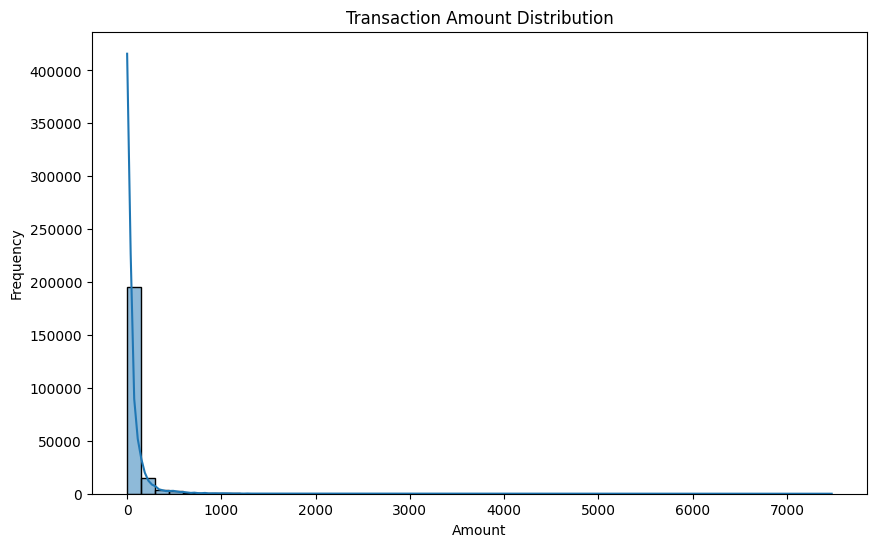

In [9]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Amount'], bins=50, kde=True)  # Histogram of the 'Amount' column
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()



This histogram shows how transaction amounts are distributed in the dataset:  
- **Most transactions have very small amounts**, forming a tall spike near zero. 
- **A few transactions have larger amounts**, but they are much less common.  
- The distribution is **right-skewed**, meaning there are many small transactions and fewer large ones. This is the normal distribution for transactions.  

**Why is this important?**  
- Fraud may be more likely in specific amount ranges.  
- The model can learn patterns based on transaction amounts.  
- Feature scaling (Standard Scaling) may be needed to handle the wide range of amounts.  

Let's view the mean amount for fraudulent and non-fraudulent transactions

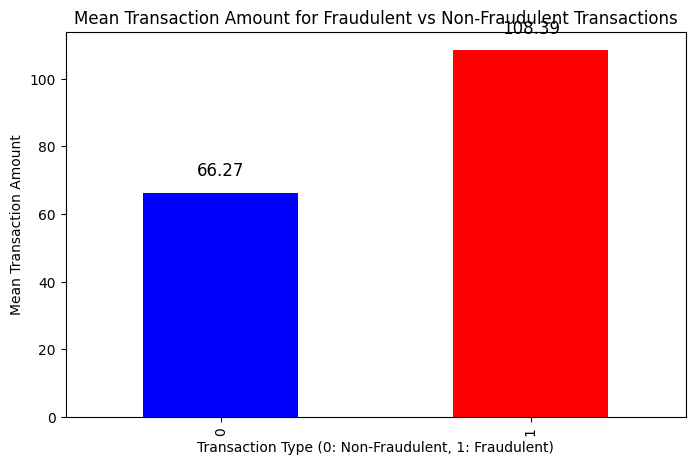

In [10]:

# Calculate mean transaction amount for fraudulent and non-fraudulent transactions
mean_amounts = df_train.groupby("Class")["Amount"].mean()

# Plot
plt.figure(figsize=(8, 5))
mean_amounts.plot(kind="bar", color=["blue", "red"])

# Labels and title
plt.xlabel("Transaction Type (0: Non-Fraudulent, 1: Fraudulent)")
plt.ylabel("Mean Transaction Amount")
plt.title("Mean Transaction Amount for Fraudulent vs Non-Fraudulent Transactions")

# Show values on bars
for i, v in enumerate(mean_amounts):
    plt.text(i, v + 5, f"{v:.2f}", ha="center", fontsize=12)

plt.show()

We can see here that on average, fraudulent transactions are higher than non-fraudulent transactions so that can be a pointer to our model

### Feature Correlations  

A correlation matrix helps us see how different features in the dataset are related to each other. Though we may not know what features V1-V28 represent, we can determine how they correlate with each other and the target variable.

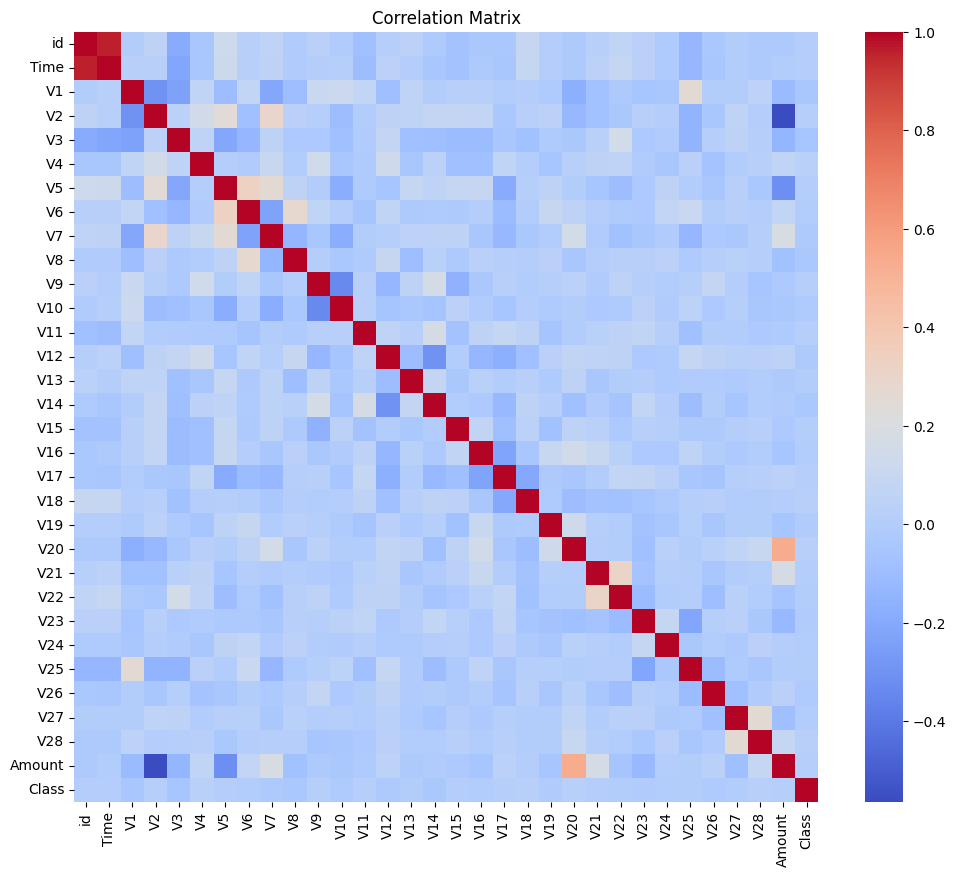

In [11]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr = df_train.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



#### Key Observations:  
- **Transaction Amount is positively correlated** with V7 and V20 and V21, meaning as the amount increases, these variables tend to increase.  
- **Transaction Amount is strongly negatively correlated** with V2 and V5, meaning when the amount increases, they tends to decrease.  
- **V3 and V25 show negative correlation with Time**, meaning these variables decrease as Time increases.  
- **Fraud Indicator (Class) has negative correlations mainly with V1 and V3**, which suggests they may be important for detecting fraud.  

 **Why is this important?**  
- Features that are highly correlated with fraud (Class) may be **important for model training**.  
- Features that are strongly correlated with each other may be **redundant** and could be removed to simplify the model.  


### Fraudulent Transactions Over Time 

This chart shows when fraudulent transactions are more likely to occur based on **relative time** in the dataset.  

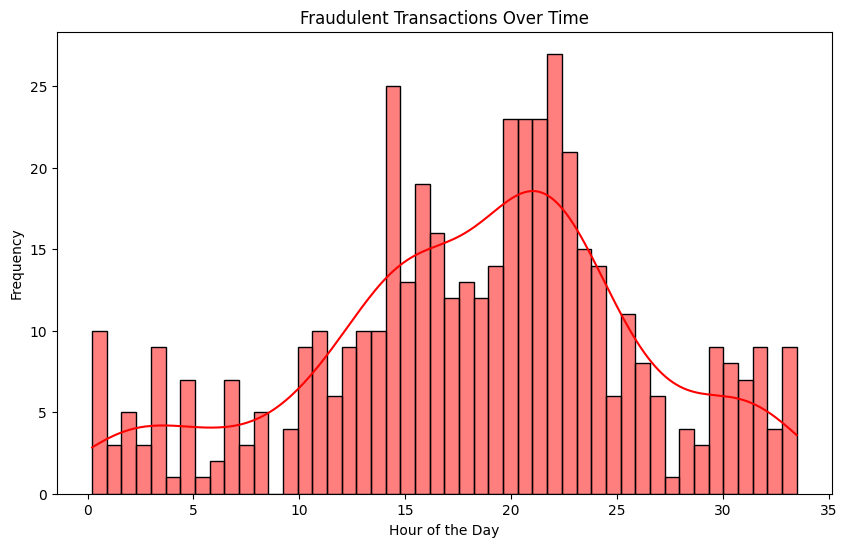

In [12]:
# Convert Time column to hours
df_train['Hour'] = df_train['Time'] / 3600  # Convert seconds to hours

# Plot fraud transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(df_train[df_train['Class'] == 1]['Hour'], bins=48, kde=True, color='red')
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

 ####  Key Observations:  
- There are peaks in fraudulent activity **around the 14th and 23rd hour** of the dataset's recorded time.  
- Further investigation is needed to understand why fraud occurs more frequently at these times.  

 **Why is this important?**  
- If fraud tends to happen at certain times, banks could **increase monitoring** during those periods.  
- This insight could help in developing **real-time fraud detection strategies**.  


# 5. Data Scaling & Standardization (Scaling step)

### Data Scaling & Standardization  

Many machine learning models perform better when all numerical features are on the **same scale**.  

####  Why is Scaling Important?  
- Some columns have **large values** (e.g., "Amount"), while others are **small**.  
- Without scaling, models may **incorrectly give more importance** to larger values.  
- Standardization **removes bias** by ensuring all features have:  
  - **Mean = 0**  
  - **Standard Deviation = 1**  

####  What Did We Do?  
- Used **StandardScaler** to transform all features.  
- Split the dataset into:  
  - **Training Set (64%)**  
  - **Validation Set (16%)**  
  - **Testing Set (20%)**  
- Now, our dataset is **scaled, standardized, and ready for fraud detection modeling**.  


In [13]:
# Separate features (X) and target variable (y)
X = df_train.drop(columns=['id','Class'])  # Features: All columns except 'Class'
y = df_train['Class']  # Target variable: 'Class' column (0 = Legitimate, 1 = Fraud)
print(X.columns)
# Store original indices for y (needed for TimeSeriesSplit)
X_indices = X.index
y_indices = y.index

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling features

# First, split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Now, split Train (80%) further into Train (80% of 80% = 64%) and Validation (20% of 80% = 16%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Convert target variables to NumPy arrays for consistency
y_test = y_test.values 
y_train = y_train.values  

print(f"Training Data: {X_train.shape}, Validation Data: {X_val.shape}, Testing Data: {X_test.shape}")

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Hour'],
      dtype='object')
Training Data: (140242, 31), Validation Data: (35061, 31), Testing Data: (43826, 31)



**Insight:**
- All features are now standardized, preventing bias toward large values.
- The dataset is now properly scaled and ready for the next step: handling imbalanced fraud cases.

- The dataset is ready for the **next step: handling imbalanced fraud cases**.

# 6. Handling Class Imbalance with SMOTE (SMOTE step)

### Handling Class Imbalance with SMOTE  

Fraud cases make up **only ~0.21%** of all transactions, making the dataset **highly imbalanced**.  
If we train a model on this data, it will **favor Non-fraudulent transactions** and struggle to detect fraud.  

####  Why Use SMOTE?  
- Fraud cases are **too rare**, so the model may **ignore them**.  
- Traditional oversampling would **duplicate** fraud cases, causing overfitting.  
- **SMOTE (Synthetic Minority Over-sampling Technique)** creates **new, realistic fraud cases**, improving learning.  



Before SMOTE: Fraud cases = 300 (0.2139%)
After SMOTE: Fraud cases = 139942 (50.0000%)


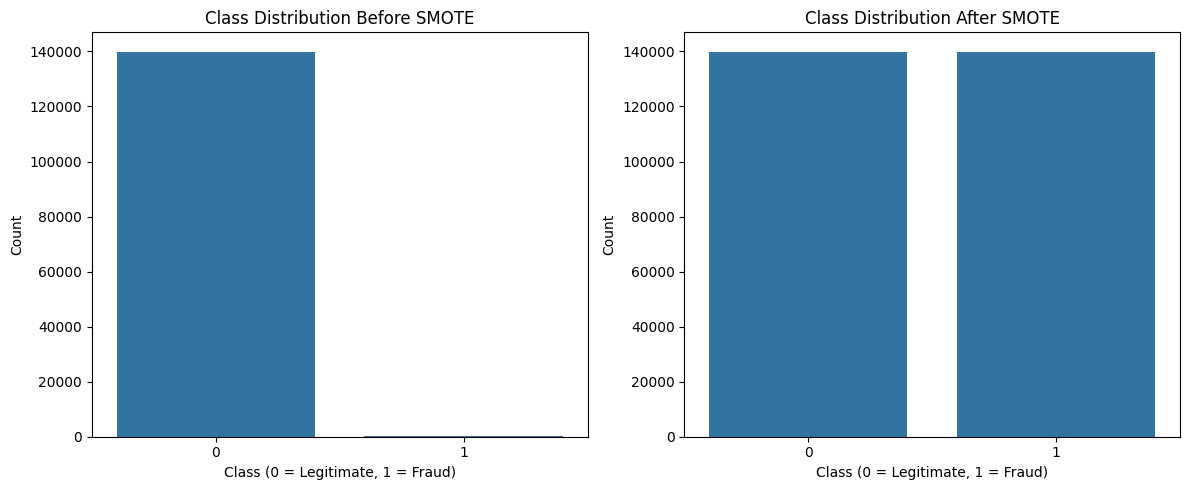

In [14]:
from collections import Counter

# Checking class distribution before SMOTE
before_smote_counts = Counter(y_train)
before_fraud_percentage = (before_smote_counts[1] / sum(before_smote_counts.values())) * 100

# Applying SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)  # Apply SMOTE ONLY on training data

# Checking class distribution after SMOTE
after_smote_counts = Counter(y_train_sm)
after_fraud_percentage = (after_smote_counts[1] / sum(after_smote_counts.values())) * 100

# Printing class distributions
print(f"Before SMOTE: Fraud cases = {before_smote_counts[1]} ({before_fraud_percentage:.4f}%)")
print(f"After SMOTE: Fraud cases = {after_smote_counts[1]} ({after_fraud_percentage:.4f}%)")

# Plotting class distribution before and after SMOTE
plt.figure(figsize=(12, 5))

# Before Applying SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

# After Applying SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Insight  

- **Before SMOTE:** Fraud cases were **less than 1%** of transactions.  
- **After SMOTE:** Fraud cases have been **synthetically increased**, balancing the dataset.  
- **Why only the training set?**  
- To **prevent data leakage** and keep the validation & test sets **representative of real-world fraud detection challenges**.  
- **Impact:** The model can now **learn fraud patterns better** without being biased toward legitimate transactions.  

Now, our dataset is **balanced and ready for training!**  


# 7. Model Training and Selection

Now that our dataset is **scaled and balanced**, we can train machine learning models to detect fraud.  

####  Why Are We Training Multiple Models?  
Each model has a different way of learning patterns, so we train multiple models to see which one performs best.  

1. **Logistic Regression** – A simple yet effective baseline model for fraud detection.  
2. **Random Forest** – A robust ensemble model that works well with imbalanced data.  
3. **XGBoost** – A high-performance boosting algorithm, known for its accuracy in classification tasks.  

After training, we will **compare their performance** to choose the best model for fraud detection.  


In [15]:
# Initializing models
log_reg = LogisticRegression(random_state=42) # Logistic Regression (baseline model)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42) # Random Forest (ensemble model)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # XGBoost (boosting model)

# Training models on SMOTE-applied training data
log_reg.fit(X_train_sm, y_train_sm)
rf.fit(X_train_sm, y_train_sm)
xgb.fit(X_train_sm, y_train_sm)

/Users/m1pro/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

- The models have been **trained** on the **balanced dataset**, meaning they have learned to differentiate **fraudulent and legitimate transactions**.  
- Each model analyzes **patterns in transaction features** (like amount, time, and PCA-generated variables) to detect fraud.  
- **How does this work?**  
  - **Logistic Regression** finds a mathematical boundary between fraud and non-fraud cases.  
  - **Random Forest** builds multiple decision trees and takes a majority vote.  
  - **XGBoost** improves predictions by focusing more on mistakes from previous iterations.  
- **Next Step:** Hyperparameter tuning to improve model performance.  



# 7.1 Hyperparameter Tuning

### Hyperparameter Tuning  

Machine learning models have **hyperparameters**—settings that control how they learn.  
Fine-tuning them helps **improve accuracy and efficiency** while preventing **overfitting**.  

####  Why Are We Doing This?  
- Default settings may not work well for **fraud detection**.  
- Optimized models **detect fraud better** by learning the right patterns.  
- We use **RandomizedSearchCV** to quickly find the best settings for all models.  



In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter search space
lr_param_grid = {
    "C": uniform(0.01, 10),  # Inverse of regularization strength
    "penalty": ["l1", "l2"]  # Regularization type
}

# Define parameter grid for Random Forest (choosing different tree depths and splits)
rf_param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples needed to split a node
}

# Define parameter grid for XGBoost (adjusting depth, learning rate, and estimators)
xgb_param_grid = {
    'n_estimators': [50, 100],  # Number of boosting rounds
    'max_depth': [3, 5, 10],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2]  # How much each tree contributes to final prediction
}

# Initialize the models without predefined parameters
logreg = LogisticRegression(solver="liblinear", random_state=42)
rf_tuned = RandomForestClassifier(random_state=42)
xgb_tuned = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Randomized Search to find best hyperparameters
lr_search = RandomizedSearchCV(logreg, lr_param_grid, n_iter=20, cv=5, scoring="roc_auc", random_state=42, n_jobs=-1)
rf_search = RandomizedSearchCV(rf_tuned, rf_param_grid, n_iter=5, scoring='roc_auc', cv=2, n_jobs=-1, random_state=42)
xgb_search = RandomizedSearchCV(xgb_tuned, xgb_param_grid, n_iter=5, scoring='roc_auc', cv=2, n_jobs=-1, random_state=42)

# Train (fit) the model using the SMOTE-balanced training data
lr_search.fit(X_train_sm, y_train_sm)
rf_search.fit(X_train_sm, y_train_sm)
xgb_search.fit(X_train_sm, y_train_sm)

# Get best models with optimal parameters
lr_best = lr_search.best_estimator_
rf_best = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_

# Display best parameters found
print("Hyperparameter tuning completed!")
print("Best Logistic Regression Parameters:", lr_search.best_params_)
print("Best Random Forest Parameters:", rf_search.best_params_)
print("Best XGBoost Parameters:", xgb_search.best_params_)


/Users/m1pro/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/m1pro/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/m1pro/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/m1pro/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

Hyperparameter tuning completed!
Best Logistic Regression Parameters: {'C': np.float64(0.017787658410143285), 'penalty': 'l2'}
Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
Best XGBoost Parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01}


- **Hyperparameter tuning is complete!** The models were trained multiple times with different settings.  
- The best parameters for **Random Forest** and **XGBoost** were selected using **F1-score**, ensuring a good balance between precision and recall.  
- The output displays the **best combination of parameters** for each model.  

Now, we will use these **optimized models** to make predictions and evaluate performance.  

### Generating Predictions on Test Data  

Now that our models are trained, we need to **evaluate how well they detect fraud** on **unseen transactions**.  

####  What Are We Doing?  
- Using the trained models to **predict fraud (1) or non-fraud (0)** on the test dataset.  
- Comparing predictions from all defaault and tuned models.
- This step helps us measure how **accurate and reliable** our models are in real-world fraud detection.  


In [17]:
# Generate predictions using both default and tuned models

# Logistic Regression (Only has one version)
y_pred_log = log_reg.predict(X_test)    # Default model
y_pred_log_tuned = lr_best.predict(X_test)  # Tuned model

# Random Forest - Default & Tuned Versions
y_pred_rf_default = rf.predict(X_test)   # Default model
y_pred_rf_tuned = rf_best.predict(X_test)  # Tuned model

# XGBoost - Default & Tuned Versions
y_pred_xgb_default = xgb.predict(X_test)   # Default model
y_pred_xgb_tuned = xgb_best.predict(X_test)  # Tuned model

print("Predictions generated for all models!")


Predictions generated for all models!


- Fraud predictions have been **generated** for the test dataset using all models.  
- These predictions will be compared to the actual fraud labels to measure **accuracy and performance**.  
- **Next Step:** We will now evaluate these predictions using AUC-ROC.  


# 8. Evaluating and Comparing Model Performance

Now that our models have made predictions, we need to measure how well they detect fraud and select the champion model based on AUC-ROC metric

In [18]:
print('Log_reg_def AUC-ROC:', roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])) 
print('Log_reg AUC-ROC:', roc_auc_score(y_test, lr_best.predict_proba(X_test)[:,1])) 
print('RF_def AUC-ROC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('RF AUC-ROC:', roc_auc_score(y_test, rf_best.predict_proba(X_test)[:,1]))
print('XgBoost_def AUC-ROC:', roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
print('XgBoost AUC-ROC:', roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:,1]))

Log_reg_def AUC-ROC: 0.7828117975833462
Log_reg AUC-ROC: 0.7828468271930968
RF_def AUC-ROC: 0.722085536468743
RF AUC-ROC: 0.718992470579993
XgBoost_def AUC-ROC: 0.6051294538689231
XgBoost AUC-ROC: 0.691939273252363


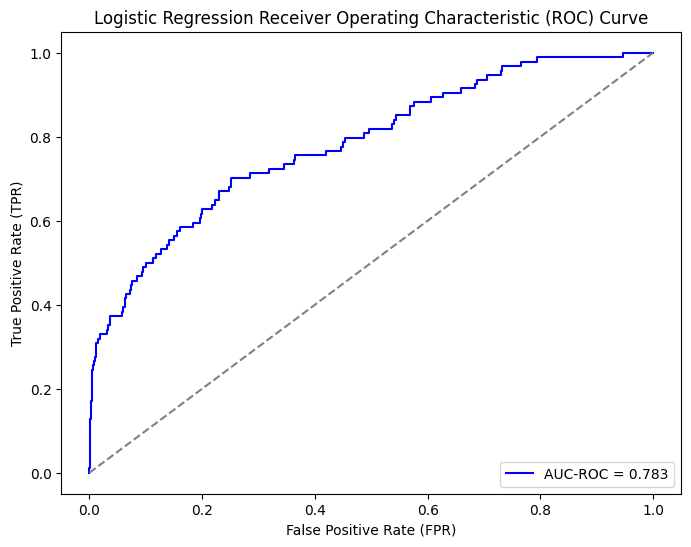

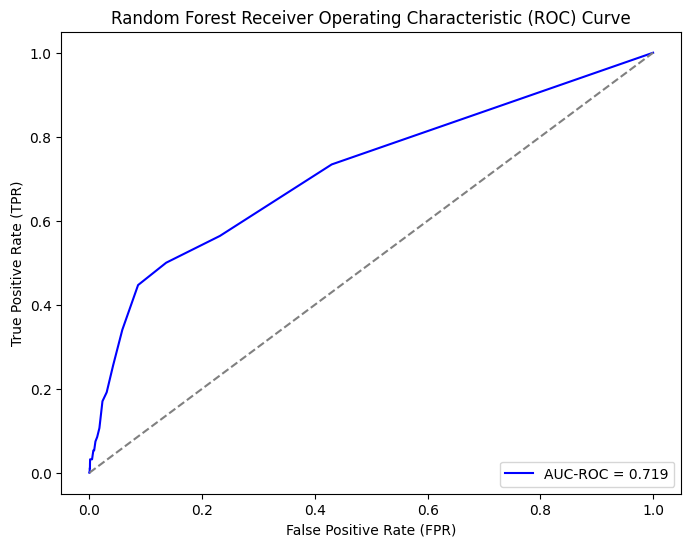

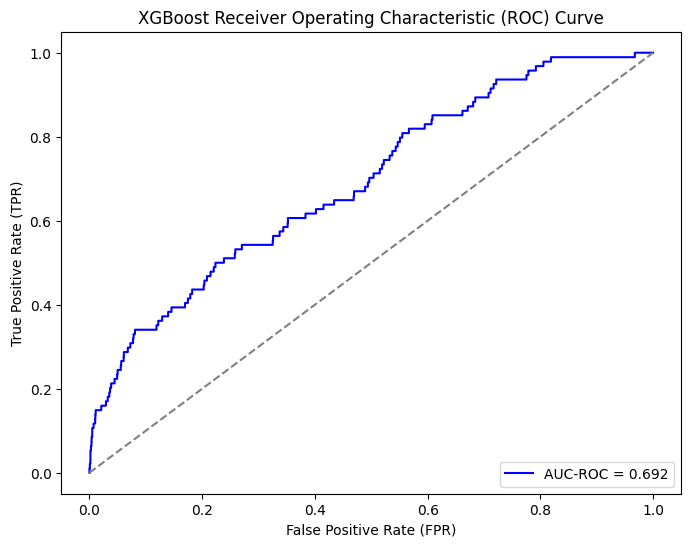

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_AUC_ROC(model_name, model, X_test, y_test):
    # Get predicted probabilities
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_probs)  # False Positive Rate, True Positive Rate
    roc_auc = auc(fpr, tpr)  # Compute AUC score

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC-ROC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f"{model_name} Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_AUC_ROC("Logistic Regression", lr_best, X_test, y_test)
plot_AUC_ROC("Random Forest", rf_best, X_test, y_test)
plot_AUC_ROC("XGBoost", xgb_best, X_test, y_test)

From Comparison, Our champion model is **LOGISTIC REGRESION MODEL** with an AUC-ROC score of **78.2%**

# 9 Feature Importance

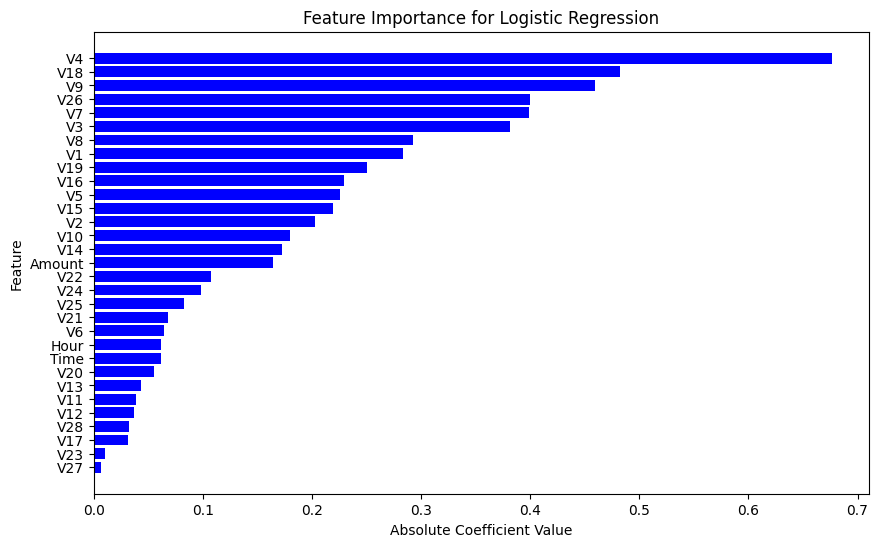

In [20]:

# Get feature importance (absolute values of coefficients)
feature_importance = np.abs(lr_best.coef_[0])  # Logistic Regression coefficients

# Create a DataFrame to store feature names and their importance
cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Hour']
feature_importance_df = pd.DataFrame({
    "Feature":cols,
    "Importance": feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="blue")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance for Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()

# 10. Predict on the provided test set to generate Submission

In order to get the best result from our model, we must undergo same preprocessing ans feature engineering carried out for the training data set

In [21]:
df_test_id = df_test['id']
df_test_gd = df_test.drop(['id'], axis=1)
df_test_gd['Hour'] = df_test_gd['Time'] / 3600  # Convert seconds to hours
X_test_sub = df_test_gd

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(X_test_sub)  # Scaling features
X_scaled_test

y_pred_lr = lr_best.predict_proba(X_scaled_test)[:, 1]   # Tuned model

submission = pd.DataFrame({'id': df_test['id'], 'Class': y_pred_lr})
submission.to_csv('submission.csv', index=False)


In [22]:
submission.head(10)

,id,Class
0,219129,0.281721
1,219130,0.178523
2,219131,0.085570
3,219132,0.473640
4,219133,0.151568
5,219134,0.202511
6,219135,0.227182
7,219136,0.566058
8,219137,0.277192
9,219138,0.536665


# 11 Future Work & Improvements

### Future Work & Next Steps

Even though our top model had an AUC-ROC score of **78.2%**, there are still ways to improve:

###  **Possible Future Improvements**
**Feature Selection:** From the Feature importance, we can select top perfomrining features from a threshold and retrain the model with it for faster taiing and inference.
 - **Better Data Handling:** More real-world / synthetic fraud data could make the model even more accurate. 
 - **Deep Learning:** We could try neural networks (e.g., LSTMs) for fraud detection.   
 - **Real-Time Deployment Pipeline:** We could deploy this model as an API to detect fraud in real transactions.  

###  **Final Thoughts**
We successfully built a **fraud detection model** that can classify transactions with AUC-ROC score of **78.2%**. This is a starting point to improving and deploying the model.   

